In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.color_palette("pastel")

%matplotlib inline

In [2]:
results = pd.read_csv("results.csv")
results2 = pd.read_csv("results2.csv")
results3 = pd.read_csv("results3.csv")
nodes = pd.read_csv("results5.csv")

nodes.head()

,Zobrist,ids_solver,ids_no_heuristic,Cython,baseline,Board_Size
0,1,1,1,1,1,1
1,3,3,3,3,3,2
2,5,5,5,5,5,3
3,9,9,9,9,9,4
4,15,19,19,15,15,5


In [63]:
ids_heuristic_len_board = results["IDS_heuristic"].tolist()
ids_heuristic_count = results2["IDS_heuristic"].tolist()
ids_no_heuristic = results["IDS_no_heuristic"].tolist()
cython = results3["Cython"].tolist()
zobrist = results["Zobrist"].tolist()
base = results["Base"].tolist()
length_base = results["board_length"].tolist()

In [64]:
zob = nodes["Zobrist"].tolist()
ids = nodes[" ids_solver"].tolist()
ids_no = nodes[" ids_no_heuristic"].tolist()
cyt = nodes[" Cython"].tolist()
baseline = nodes[" baseline"].tolist()
board = nodes[" Board_Size"].tolist()

ids_heuristic_count = ids_heuristic_count[:30]
ids_no_heuristic = ids_no_heuristic[:30]
cython = cython[:30]
zobrist = zobrist[:30]
base = base[:30]

In [65]:
def get_log(x):
    return [math.log(i) for i in x]

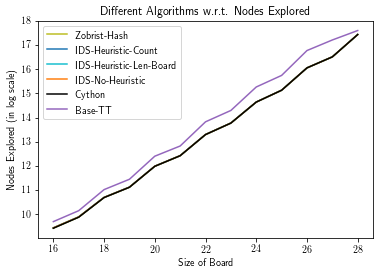

In [72]:
plt.rcParams['text.usetex'] = True
plt.plot(board[15:28], get_log(zob[15:28]), color='tab:olive', label='Zobrist-Hash')
plt.plot(board[15:28], get_log(ids[15:28]), color='tab:blue', label='IDS-Heuristic-Count')
plt.plot(board[15:28], get_log(ids[15:28]), color='tab:cyan', label='IDS-Heuristic-Len-Board')
plt.plot(board[15:28], get_log(ids_no[15:28]), color='tab:orange', label='IDS-No-Heuristic')
plt.plot(board[15:28], get_log(cyt[15:28]), color='k', label='Cython')
plt.plot(board[15:28], get_log(baseline[15:28]), color='tab:purple', label='Base-TT')
plt.legend()
plt.xlabel("Size of Board")
plt.ylabel("Nodes Explored (in log scale)")
plt.title("Different Algorithms w.r.t. Nodes Explored")
plt.savefig('algs.pdf', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Different Algorithms w.r.t. Nodes Explored')

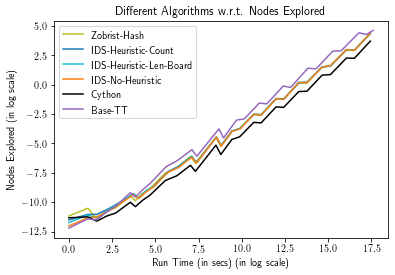

In [71]:
plt.rcParams['text.usetex'] = True
plt.plot(get_log(zob[:28]), get_log(zobrist[:28]),  color='tab:olive', label='Zobrist-Hash')
plt.plot(get_log(ids[:28]), get_log(ids_heuristic_count[:28]), color='tab:blue', label='IDS-Heuristic-Count')
plt.plot(get_log(ids[:28]), get_log(ids_heuristic_len_board[:28]), color='tab:cyan', label='IDS-Heuristic-Len-Board')
plt.plot(get_log(ids_no[:28]), get_log(ids_no_heuristic[:28]), color='tab:orange', label='IDS-No-Heuristic')
plt.plot(get_log(cyt[:28]), get_log(cython[:28]), color='k', label='Cython')
plt.plot(get_log(baseline[:28]), get_log(base[:28]), color='tab:purple', label='Base-TT')
plt.legend()
plt.xlabel("Run Time (in secs) (in log scale)")
plt.ylabel("Nodes Explored (in log scale)")
plt.title("Different Algorithms w.r.t. Nodes Explored")

In [91]:
for fill in range(len(ids_heuristic_len_board)-len(ids_heuristic_count)):
    ids_heuristic_count.append(100)

In [93]:
for fill in range(len(ids_heuristic_len_board)-len(cython)):
    cython.append(100)

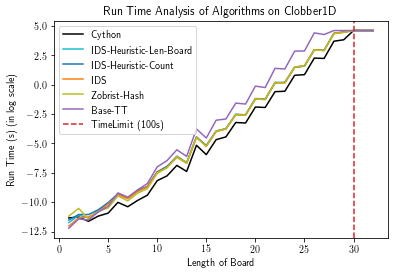

In [102]:
plt.rcParams['text.usetex'] = True
plt.plot(length_base[:32], get_log(cython[:32]), color='k', label='Cython')
plt.plot(length_base[:32], get_log(ids_heuristic_len_board[:32]), color='tab:cyan', label='IDS-Heuristic-Len-Board')
plt.plot(length_base[:32], get_log(ids_heuristic_count[:32]), color='tab:blue', label='IDS-Heuristic-Count')
plt.plot(length_base[:32], get_log(ids_no_heuristic[:32]), color='tab:orange', label='IDS')
plt.plot(length_base[:32], get_log(zobrist[:32]), color='tab:olive', label='Zobrist-Hash')
plt.plot(length_base[:32], get_log(base[:32]), color='tab:purple', label='Base-TT')
plt.axvline(x=30, label='TimeLimit (100s)', color='tab:red', linestyle='--')
plt.legend(loc='upper left')
plt.title("Run Time Analysis of Algorithms on Clobber1D")
plt.xlabel("Length of Board")
plt.ylabel("Run Time (s) (in log scale)")
plt.savefig('analysis.pdf', dpi=300, bbox_inches='tight')
plt.show()

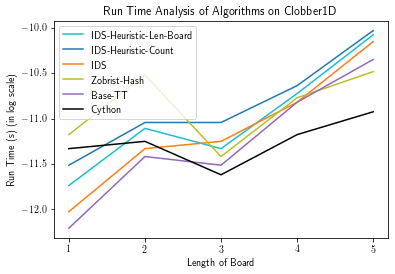

In [101]:
plt.rcParams['text.usetex'] = True
plt.plot(length_base[:5], get_log(ids_heuristic_len_board[:5]), color='tab:cyan', label='IDS-Heuristic-Len-Board')
plt.plot(length_base[:5], get_log(ids_heuristic_count[:5]), color='tab:blue', label='IDS-Heuristic-Count')
plt.plot(length_base[:5], get_log(ids_no_heuristic[:5]), color='tab:orange', label='IDS')
plt.plot(length_base[:5], get_log(zobrist[:5]), color='tab:olive', label='Zobrist-Hash')
plt.plot(length_base[:5], get_log(base[:5]), color='tab:purple', label='Base-TT')
plt.plot(length_base[:5], get_log(cython[:5]), color='k', label='Cython')
plt.legend(loc='upper left')
plt.title("Run Time Analysis of Algorithms on Clobber1D")
plt.xticks([x+1 for x in range(5)])
plt.xlabel("Length of Board")
plt.ylabel("Run Time (s) (in log scale)")
plt.savefig('analysis_5.pdf', dpi=300, bbox_inches='tight')
plt.show()